In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import scipy.cluster.hierarchy as ch
import lmfit as lm

In [2]:
egfp=scipy.io.loadmat('egfp.mat')
egfp0=egfp['egfp'][0][0].T
egfp1=egfp['egfp'][0][1].T
egfp2=egfp['egfp'][0][2].T
egfp3=egfp['egfp'][0][3].T
egfp4=egfp['egfp'][0][4].T
egfp5=egfp['egfp'][0][5].T
print(egfp0.shape)
print(egfp0[0])

(69, 87)
[    7.613     8.783     8.043     8.146     7.87     14.792    17.223
    18.214    50.67     86.331   128.749   178.647   282.779   347.294
   393.399   486.373   540.401   604.65    674.073   708.502   835.821
   968.104  1126.307  1246.89   1448.615  1615.209  1769.466  1989.18
  2062.952  2247.619  2568.201  2620.879  2844.773  2843.494  3010.477
  3145.863  3299.286  3456.149  3600.052  3754.178  3885.305  4007.221
  4155.592  4282.545  4381.757  4494.516  4684.44   4897.518  5068.585
  5160.991  4906.733  4844.889  5490.896  5603.009  5129.406  5303.168
  5639.464  5653.383  5458.522  5659.411  5636.559  5583.468  5548.399
  5750.172  5816.064  6112.156  6632.024  7354.074  7362.499  6280.564
  7545.685  7125.455  7421.587  7148.4    6970.323  6403.552  6138.144
  6293.732  6446.317  6515.006  6636.946  6594.705  6570.312  6689.705
  6709.791  6664.908  6627.534]


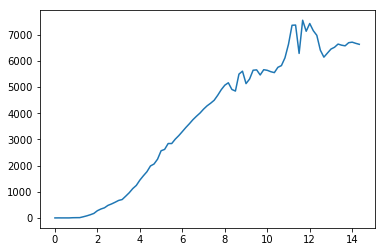

In [3]:
time = np.arange(0,egfp0[0].size)*10/60
data = np.array(egfp0[0])
plt.plot(time,data)

In [4]:
# normalize the data
time_norm=(time-time.min())/50/(time.max()-time.min())
t0_list=[]
for data in egfp0:
    data_norm=(data-data.min())/(data.max()-data.min())
    data_diff_norm=np.gradient(data_norm)
    # combine the data
    X = np.vstack((time_norm,data_norm,data_diff_norm)).T
    # generate the linkage matrix
    Z = ch.linkage(X, method='single',metric='cityblock')
    tree = ch.cut_tree(Z, height=0.003).flatten()
    t0_list.append(tree[tree==0].size)
t0_list=np.array(t0_list)

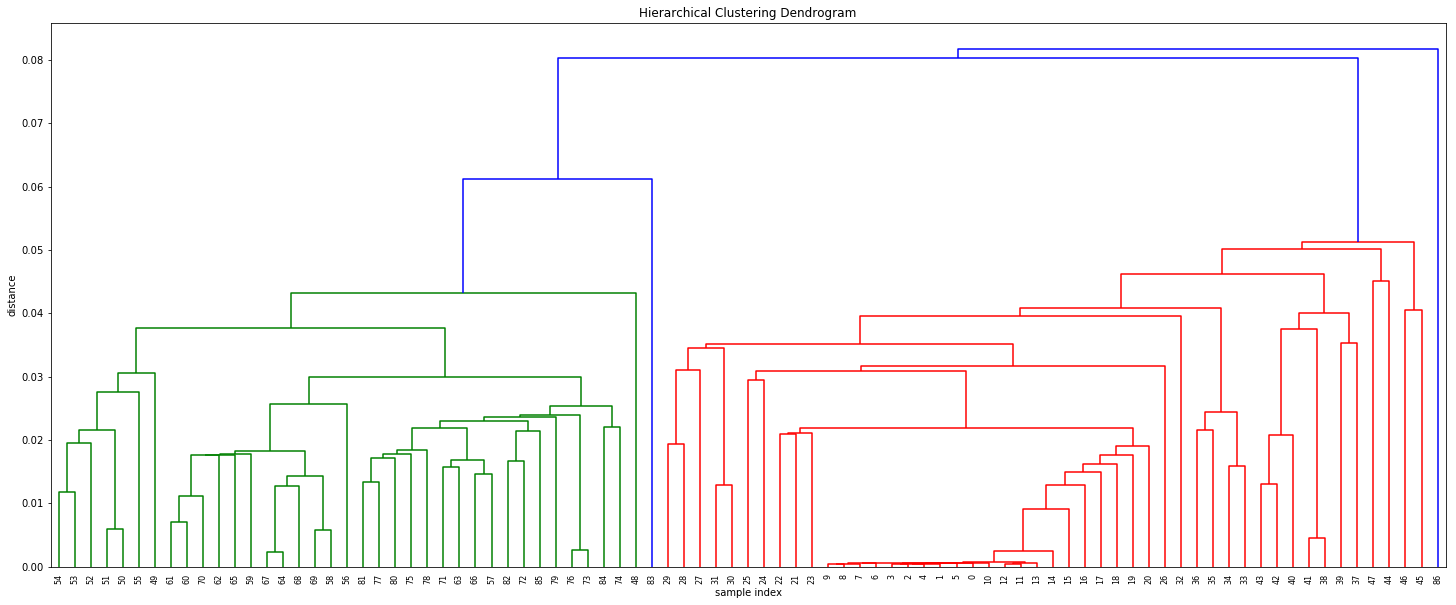

In [6]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
#    count_sort=True,
    distance_sort='descending',
#    truncate_mode='lastp',  # show only the last p merged clusters
#    p=100,  # show only the last p merged clusters
#    show_leaf_counts=False,  # otherwise numbers in brackets are counts
)
plt.show()

(array([ 10.,  13.,  15.,  13.,   9.,   2.,   4.,   2.,   0.,   1.]),
 array([ 0.16666667,  0.83333333,  1.5       ,  2.16666667,  2.83333333,
         3.5       ,  4.16666667,  4.83333333,  5.5       ,  6.16666667,
         6.83333333]),
 <a list of 10 Patch objects>)

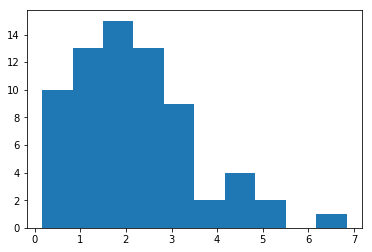

In [7]:
plt.hist(t0_list*10/60)